# Lead generation customer value exploration

In [1]:
## Load libraries (o_o)=<

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math 
import pickle
import pylab

from scipy import stats
from scipy.stats import kurtosis, skew
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
pd.options.display.max_rows = 10
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:8,.2f}'.format

In [7]:
## Load and verify data set (o_o)=====<

#load data
data = pd.read_excel('..\\data\\LeadData_Equipment_All.xlsx', index_col='SerialNumber')

#Show summary
#data.head()

#Verify data types
data = data.astype(float)
#data.dtypes

#Verify data size
#data.shape

# Print data columns for copy and paste
data.columns

Index(['Age_Months', 'LTDSMU', 'CalculatedAnnualUsage', 'HistoricAnnualUsage',
       'PARTS_EQ_0_12M', 'PARTS_COUNT_EQ_0_12M', 'PARTS_BACKOUT_Percentage_EQ',
       'SERVICES_EQ_0_12M', 'SERVICES_COUNT_EQ_0_12M',
       'SERVICES_BACKOUT_Percentage_EQ', 'SOS_COUNT_EQ_0_12M',
       'PLSubscriptionActive', 'PLDeviceActive', 'EMT', 'MARC', 'PMContract',
       'Warranty_Days_Remaining', 'CSA_Days_Remaining', 'Lease_Days_Remaining',
       'FuelConsumptionPercentageOverAverage', 'IdlingPercent', 'OLGAAmount',
       'WODollarTotal', 'POPS_EQ', 'AverageDaysToPay',
       'PARTS_Total_Per_CatFleetSize', 'PARTS_Count_Per_CatFleetSize',
       'PARTS_Count_Per_500HR_Utilized', 'PartsReturnPercentage_CU',
       'SERVICES_Total_Per_CatFleetSize', 'SERVICES_Count_Per_CatFleetSize',
       'SERVICES_Count_Per_500HR_Utilized', 'SOS_Count_Per_CatFleetSize',
       'SOS_Count_Per_500HR_Utilized', 'ServicesBackOutPercentage_CU',
       'Percentage_PLDeviceSerialNumber', 'PercentageFleetUtilized',
 

# Explore the data in multiple linear regression (o_o)!~/\

## Verify Data and building correlation matrix

In [8]:
# check for missing values
display(data.isna().any())

# verify/drop any missing values
#customer_filtered.isna().any()
data_dropna = data.dropna() 
#instead of dropna. i decided to drop columns instead.
#data_dropna = data.drop(['Average_Fleet_Age_Months','Average_Fleet_Hours'], axis = 1)
# verify data size
data_dropna.shape

Age_Months                      True
LTDSMU                          True
CalculatedAnnualUsage          False
HistoricAnnualUsage             True
PARTS_EQ_0_12M                 False
                               ...  
PartsDCAL                      False
ServiceDCAL                    False
Average_Fleet_Age_Months        True
Average_Fleet_Hours             True
UtilizationOverFleetAverage     True
Length: 45, dtype: bool

(6592, 45)

In [9]:
#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all 
#rows that have outliers in at least one column, the following expression 
#would do that in one shot: select absolute Z score for the row <3 (). .all or .any

data_filtered_by_z = data_dropna[(np.abs(stats.zscore(data_dropna)) < 3).all(axis=1)]
data_filtered_by_z.shape

(4910, 45)

In [10]:
# Compute the correlation matrix
corr_matrix = round(data_filtered_by_z.corr(),2)

# get sorted correlation
# def get_redundant_pairs(df):
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

def get_sorted_corr(df):
    crr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     crr = crr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return crr

# I did not remove duplicates because i will be using excel filters

get_sorted_corr(data_filtered_by_z)

sorted_corr = get_sorted_corr(data_dropna)
sorted_corr.to_csv('..\\data\\Output\\Sorted_Correlation_Customer_filtered_by_z.csv')

display(corr_matrix)

,Age_Months,LTDSMU,CalculatedAnnualUsage,HistoricAnnualUsage,PARTS_EQ_0_12M,PARTS_COUNT_EQ_0_12M,PARTS_BACKOUT_Percentage_EQ,SERVICES_EQ_0_12M,SERVICES_COUNT_EQ_0_12M,SERVICES_BACKOUT_Percentage_EQ,...,Percentage_PLDeviceSerialNumber,PercentageFleetUtilized,Percentage_Cat,Avg_AnnualUsage,Avg_HistoricAnnualUsage,PartsDCAL,ServiceDCAL,Average_Fleet_Age_Months,Average_Fleet_Hours,UtilizationOverFleetAverage
Age_Months,1.00,0.61,-0.02,0.19,0.20,0.24,0.08,0.03,-0.04,0.08,...,-0.06,-0.04,0.01,0.01,0.01,-0.04,0.02,0.33,0.23,-0.01
LTDSMU,0.61,1.00,0.24,0.51,0.24,0.28,0.08,0.11,0.07,0.09,...,-0.03,-0.01,0.02,0.17,0.05,-0.01,0.03,0.23,0.36,0.06
CalculatedAnnualUsage,-0.02,0.24,1.00,0.67,0.23,0.31,0.09,0.19,0.29,0.09,...,0.07,0.13,-0.03,0.48,0.06,0.04,0.04,0.02,0.20,0.34
HistoricAnnualUsage,0.19,0.51,0.67,1.00,0.27,0.32,0.08,0.16,0.19,0.08,...,0.03,0.06,-0.00,0.39,0.11,0.04,0.02,0.11,0.30,0.17
PARTS_EQ_0_12M,0.20,0.24,0.23,0.27,1.00,0.76,0.17,0.10,0.03,0.22,...,-0.01,0.01,-0.04,0.14,0.04,0.14,0.03,0.10,0.17,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PartsDCAL,-0.04,-0.01,0.04,0.04,0.14,0.14,0.02,0.15,0.18,0.02,...,0.30,0.31,0.01,0.24,0.11,1.00,0.55,-0.15,0.02,-0.20
ServiceDCAL,0.02,0.03,0.04,0.02,0.03,0.02,-0.00,0.30,0.40,-0.03,...,0.38,0.43,0.03,0.32,0.03,0.55,1.00,-0.17,0.02,-0.25
Average_Fleet_Age_Months,0.33,0.23,0.02,0.11,0.10,0.14,0.06,-0.00,-0.08,0.07,...,-0.64,-0.58,-0.08,-0.33,0.12,-0.15,-0.17,1.00,0.52,0.38
Average_Fleet_Hours,0.23,0.36,0.20,0.30,0.17,0.19,0.10,0.12,0.06,0.08,...,-0.23,-0.15,-0.03,0.15,0.23,0.02,0.02,0.52,1.00,0.07


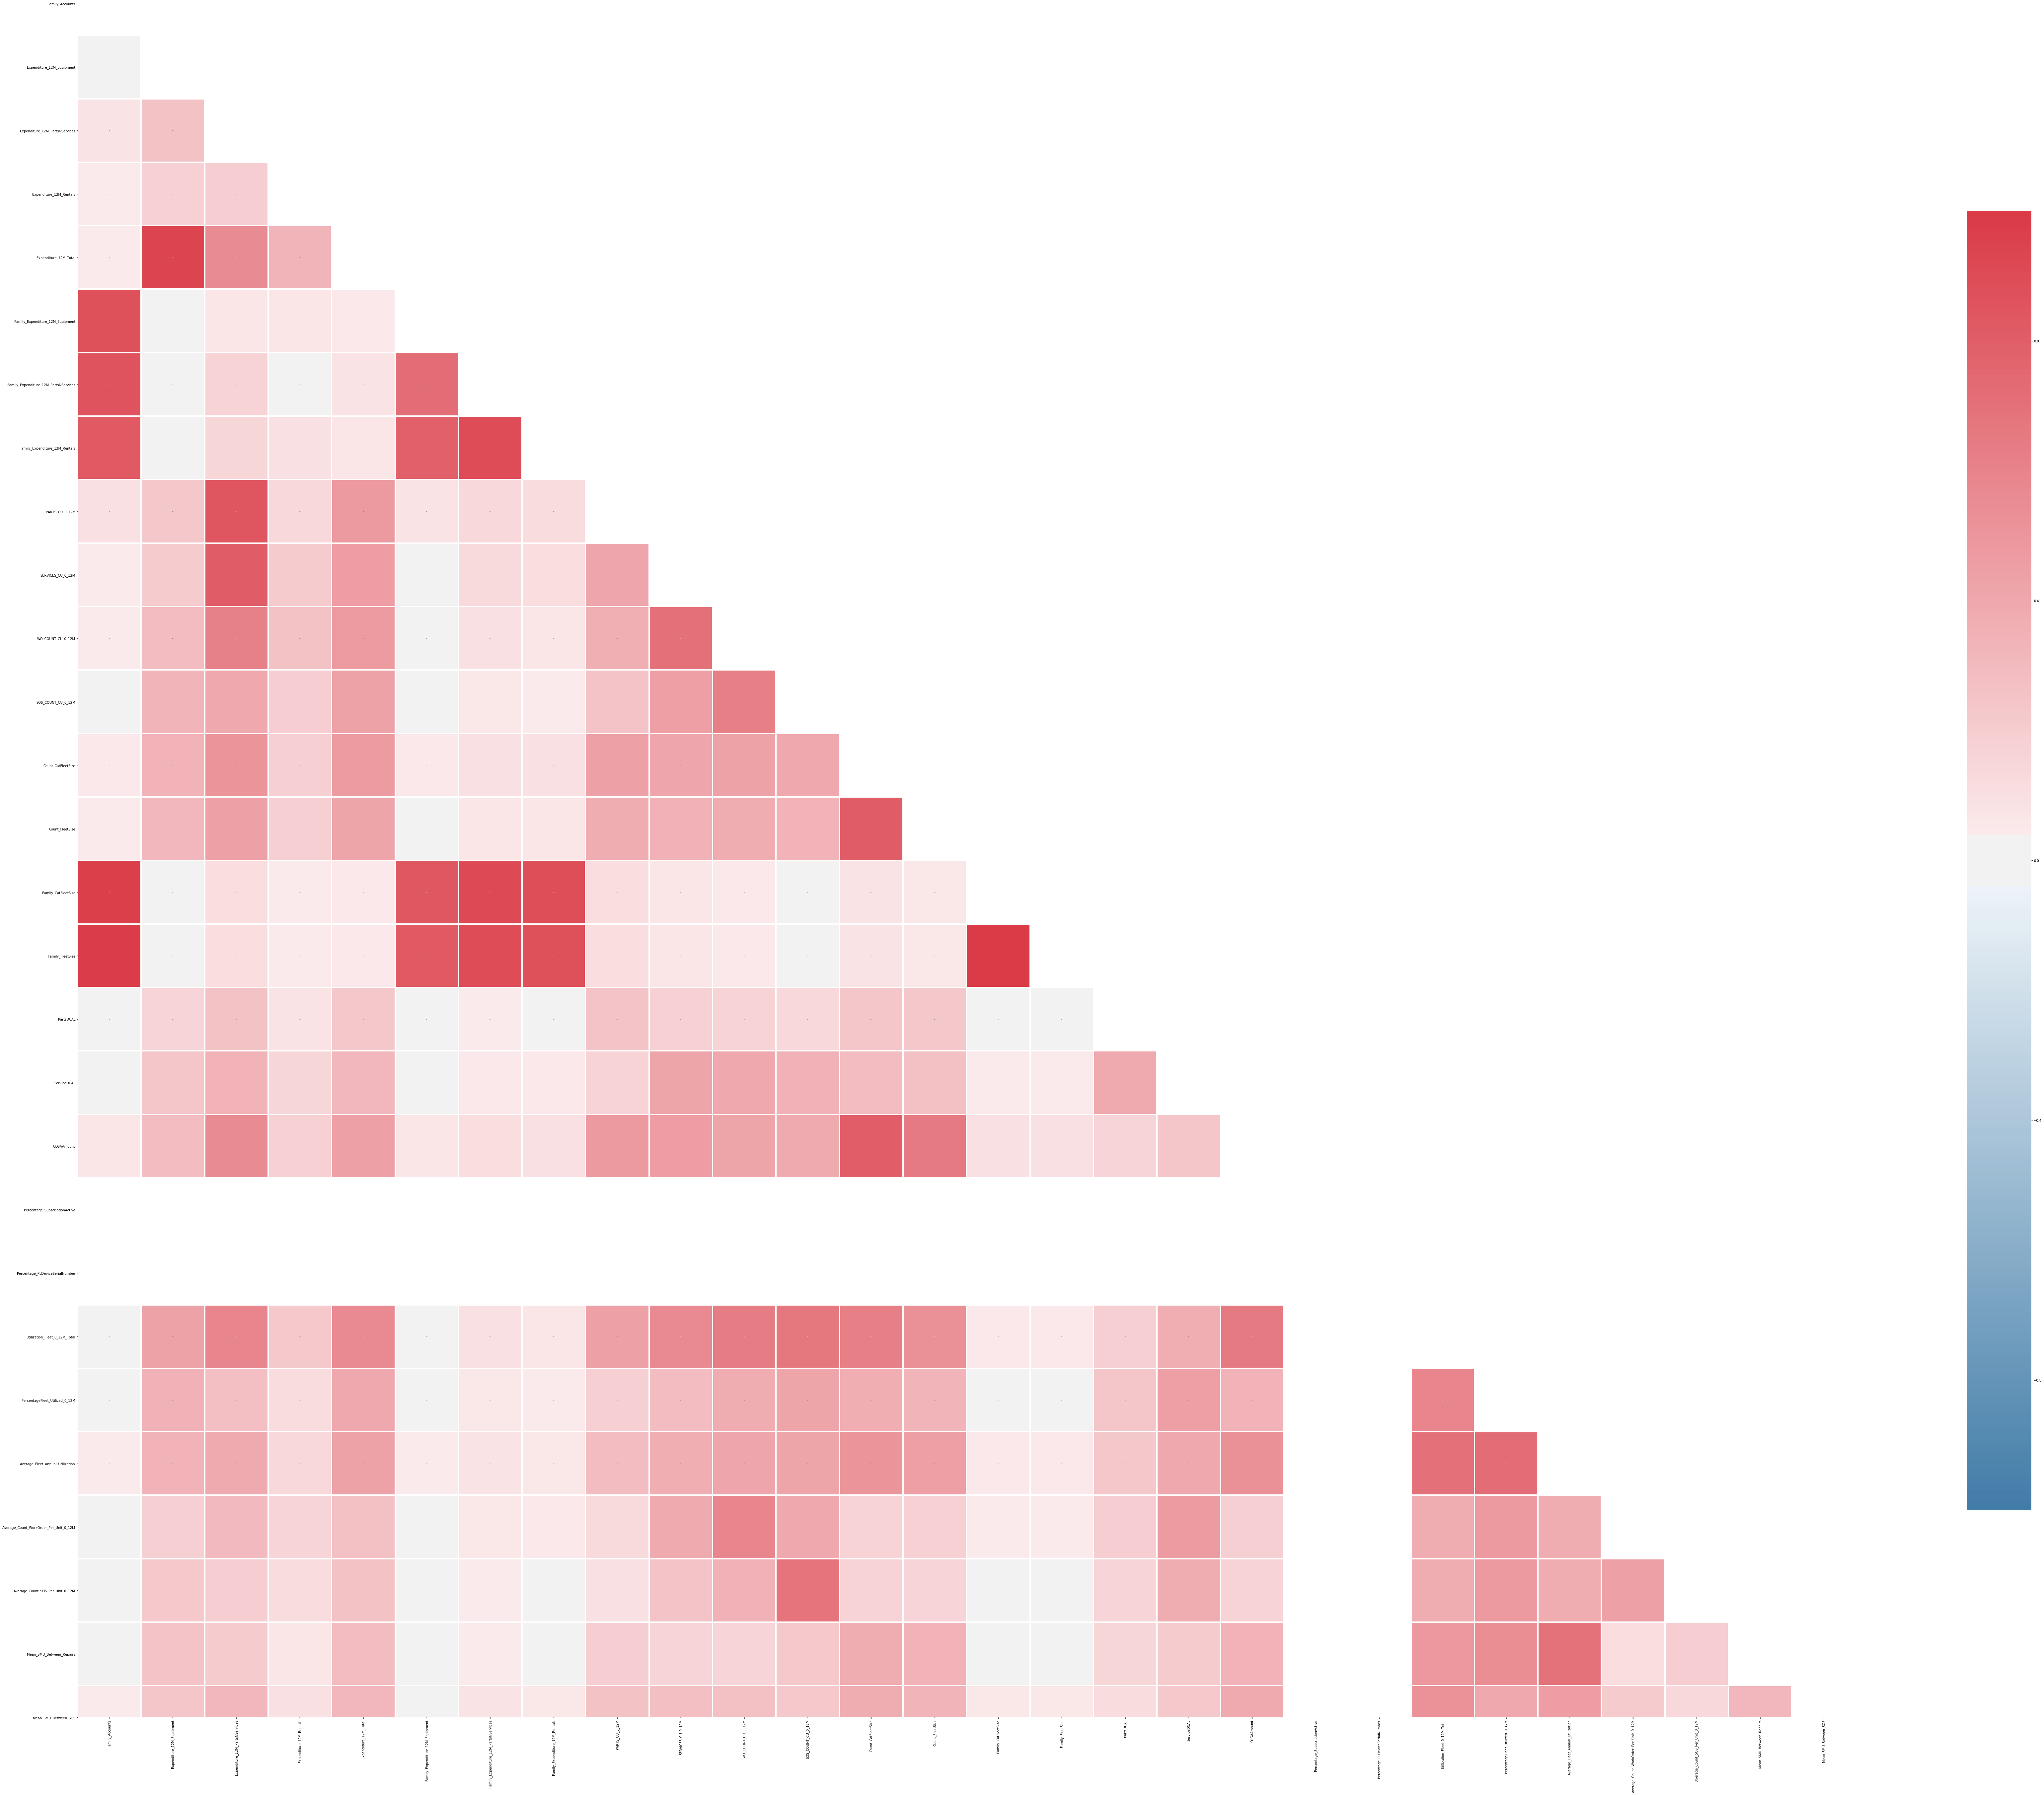

In [10]:
#Generate a chart for correlations

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(120, 120))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

heatmap = sns.heatmap(corr_matrix, mask=mask, cmap=cmap,
                      square=True, linewidths=3,
                      cbar_kws = {'shrink': 0.6},
                      vmin=-1, vmax=1,
                      annot=True, annot_kws = {'size': 2})

# add the column names as labels
ax.set_yticklabels(corr_matrix.columns)
ax.set_xticklabels(corr_matrix.columns)

# plt.show()
plt.savefig('..\\data\\Output\\Correlation_Matrix_Customer_filtered_by_Z')

In [ ]:
#OR using yoyo's plot (sns)
#plt.style.use('seaborn-ticks')

#sns.pairplot(data_filtered_by_z, kind='reg', diag_kind='hist',
#             height=2.5, aspect=1,
#             plot_kws={'scatter_kws': {'alpha': 0.7}})
#save the plot
#plt.savefig('..\\data\\Output\\Scatter_Plot_Customer_filtered_by_z')

## Testing 1 assumption: y = 'PARTS_EQ_0_12M'

### Drop variables with very low correlation to Y

In [12]:
#Drop columns with very low correlations
customer_filtered = data_dropna.drop([
    'SOS_Count_Per_CatFleetSize'       #0.038524450889812
    ,'CSA_Days_Remaining'       #0.0347370466787486
    ,'PartsReturnPercentage_CU'       #0.03348038910505
    ,'SERVICES_Total_Per_CatFleetSize'       #0.0323507017179335
    ,'PercentageFleetUtilized'       #0.0287909986542302
    ,'EMT'       #0.0276743327821302
    ,'PMContract'       #0.0276676722946433
    ,'SERVICES_Count_Per_CatFleetSize'       #0.0254876420075093
    ,'SERVICES_EQ_0_12M'       #0.024120326948996
    ,'ServiceDCAL'       #0.0211827612475528
    ,'PLDeviceActive'       #0.0154737776412353
    ,'FuelConsumptionPercentageOverAverage'       #0.0141084537043715
    ,'Percentage_PLDeviceSerialNumber'       #0.0133357101062391
    ,'SERVICES_Count_Per_500HR_Utilized'       #0.00982856506401035
    ,'MARC'       #0.00900194859404757
    ,'AverageDaysToPay'       #0.00882855720261805
    ,'PARTS_Count_Per_500HR_Utilized'       #0.00829972873927927
    ,'Percentage_Cat'       #0.0076671121922383
    ,'LTDSMU'       #0.00744243318328073
    ,'Avg_HistoricAnnualUsage'       #0.00568613389379009
    ,'SOS_Count_Per_500HR_Utilized'       #0.00543888487252454
    ,'IdlingPercent'       #0.00320024144050275
    ,'SERVICES_COUNT_EQ_0_12M'       #0.0030476006215878
    ,'UtilizationOverFleetAverage'       #0.00138355869350675
    ,'ServicesBackOutPercentage_CU'       #0.000360783281696712
    ,'Lease_Days_Remaining'       #0.000326520222420836
     ],axis = 1)
customer_filtered.shape

(6592, 19)

### Testing for Multicollinearity

In [13]:
# define two data frames one before the drop and one after the drop
customer_filtered_before = customer_filtered
customer_filtered_after = customer_filtered.drop([
    'WODollarTotal'       #0.115419275443378
    ],axis = 1)

#Step by step:
#look for pairs in correlation matrix, find extreme high correlations and drop 1 of the two
#review before/after series and correlation matrix back and forth Multiculinearity 
#shows high and somewhat similiar variance inflation factor
#inf means extremely large and should be concerned
#for pairs, drop the variable that is less complete/reliable, or if they could be calculated
#from one another, or  has lower correlation to Y

#set maximum display row to 100
pd.options.display.max_rows = 100

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(customer_filtered_before)
X2 = sm.tools.add_constant(customer_filtered_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series

print('DATA BEFORE')
print('-'*100)
display(series_before)
#series_before.to_csv('..\\data\\Output\\series_before.csv')

print('DATA AFTER')
print('-'*100)
display(series_after)
#series_after.to_csv('..\\data\\Output\\series_after.csv')

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                               21.93
Age_Months                           1.90
CalculatedAnnualUsage                2.35
HistoricAnnualUsage                  1.87
PARTS_EQ_0_12M                       1.95
PARTS_COUNT_EQ_0_12M                 2.13
PARTS_BACKOUT_Percentage_EQ          1.21
SERVICES_BACKOUT_Percentage_EQ       1.32
SOS_COUNT_EQ_0_12M                   1.67
PLSubscriptionActive                 1.18
Warranty_Days_Remaining              1.74
OLGAAmount                           1.50
WODollarTotal                        1.46
POPS_EQ                              2.16
PARTS_Total_Per_CatFleetSize         2.14
PARTS_Count_Per_CatFleetSize         2.08
Avg_AnnualUsage                      2.30
PartsDCAL                            2.14
Average_Fleet_Age_Months             1.55
Average_Fleet_Hours                  1.12
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                               21.35
Age_Months                           1.75
CalculatedAnnualUsage                2.35
HistoricAnnualUsage                  1.85
PARTS_EQ_0_12M                       1.95
PARTS_COUNT_EQ_0_12M                 2.13
PARTS_BACKOUT_Percentage_EQ          1.20
SERVICES_BACKOUT_Percentage_EQ       1.32
SOS_COUNT_EQ_0_12M                   1.58
PLSubscriptionActive                 1.18
Warranty_Days_Remaining              1.74
OLGAAmount                           1.47
POPS_EQ                              2.16
PARTS_Total_Per_CatFleetSize         2.14
PARTS_Count_Per_CatFleetSize         2.07
Avg_AnnualUsage                      2.29
PartsDCAL                            2.13
Average_Fleet_Age_Months             1.54
Average_Fleet_Hours                  1.12
dtype: float64

In [14]:
# get the summary
desc_df = X2.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,const,Age_Months,CalculatedAnnualUsage,HistoricAnnualUsage,PARTS_EQ_0_12M,PARTS_COUNT_EQ_0_12M,PARTS_BACKOUT_Percentage_EQ,SERVICES_BACKOUT_Percentage_EQ,SOS_COUNT_EQ_0_12M,PLSubscriptionActive,Warranty_Days_Remaining,OLGAAmount,POPS_EQ,PARTS_Total_Per_CatFleetSize,PARTS_Count_Per_CatFleetSize,Avg_AnnualUsage,PartsDCAL,Average_Fleet_Age_Months,Average_Fleet_Hours
count,"6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00","6,592.00"
mean,1.00,60.13,"1,013.24","1,136.89","3,210.42",4.27,2.80,3.68,6.52,0.57,305.50,"61,248.55",33.26,"5,899.82",7.86,665.49,44.35,97.47,"10,950.91"
std,0.00,41.06,809.14,863.71,"9,878.36",6.73,13.32,20.75,10.73,0.50,508.57,"93,544.87",29.34,"11,243.00",9.76,477.44,29.26,41.56,"18,130.39"
min,1.00,1.00,"-6,372.00",0.00,"-30,680.00",-3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-9,884.00",-1.00,0.71,0.01,1.00,86.00
25%,1.00,26.00,472.00,623.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,413.38",7.65,"1,179.75",2.00,330.00,21.20,66.00,"4,706.75"
50%,1.00,55.00,876.00,"1,003.75",676.50,2.00,0.00,0.00,1.00,1.00,0.00,"24,951.81",26.62,"3,520.00",6.00,575.33,38.84,100.00,"7,437.50"
75%,1.00,86.00,"1,382.75","1,452.70","2,835.25",5.00,0.00,0.00,10.00,1.00,533.50,"83,527.58",52.83,"7,617.00",11.00,907.26,66.29,125.00,"11,641.00"
max,1.00,216.00,"7,843.00","31,452.05","322,087.00",178.00,300.00,600.00,115.00,1.00,"2,424.00","1,367,864.55",100.00,"473,911.00",223.00,"5,513.25",100.00,297.00,"504,020.00"
+3_std,1.00,183.30,"3,440.68","3,728.03","32,845.50",24.47,42.77,65.94,38.70,2.05,"1,831.21","341,883.14",121.28,"39,628.82",37.15,"2,097.81",132.12,222.15,"65,342.07"
-3_std,1.00,-63.04,"-1,414.19","-1,454.25","-26,424.66",-15.92,-37.17,-58.58,-25.66,-0.92,"-1,220.21","-219,386.05",-54.76,"-27,829.18",-21.42,-766.82,-43.42,-27.21,"-43,440.25"


### Create regression model using split

In [15]:
# define our input variable (X) & output variable
X = customer_filtered_after.drop('PARTS_EQ_0_12M', axis = 1)
Y = customer_filtered_after[['PARTS_EQ_0_12M']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object
regression_model = LinearRegression()
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# let's grab the coefficient of our model and the intercept
intercept2 = regression_model.intercept_[0]
coefficent2 = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept2))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -1.16e+03
----------------------------------------------------------------------------------------------------
The Coefficient for Age_Months is 0.84
The Coefficient for CalculatedAnnualUsage is -0.74
The Coefficient for HistoricAnnualUsage is 0.36
The Coefficient for PARTS_COUNT_EQ_0_12M is 9.8e+02
The Coefficient for PARTS_BACKOUT_Percentage_EQ is -1.1e+01
The Coefficient for SERVICES_BACKOUT_Percentage_EQ is 4.5e+01
The Coefficient for SOS_COUNT_EQ_0_12M is -2.1e+01
The Coefficient for PLSubscriptionActive is -2.3e+02
The Coefficient for Warranty_Days_Remaining is 0.36
The Coefficient for OLGAAmount is 0.0045
The Coefficient for POPS_EQ is 0.15
The Coefficient for PARTS_Total_Per_CatFleetSize is 0.086
The Coefficient for PARTS_Count_Per_CatFleetSize is -9.3e+01
The Coefficient for Avg_AnnualUsage is 0.2
The Coefficient for PartsDCAL is 9.5
The Coefficient for Average_Fleet_Age_Months is -0.082
The Coefficient for Average_Fleet_Hours is -0.01


In [16]:
# #Print trained model OLS
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         PARTS_EQ_0_12M   R-squared (uncentered):                   0.574
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              416.4
Date:                Mon, 04 May 2020   Prob (F-statistic):                        0.00
Time:                        00:13:38   Log-Likelihood:                         -53933.
No. Observations:                5273   AIC:                                  1.079e+05
Df Residuals:                    5256   BIC:                                  1.080e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

### Measures of Error

In [17]:
y_predict = regression_model.predict(X_test)

# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.28e+07
MAE 2.68e+03
RMSE 8.53e+03


In [18]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.33


## Testing 2 assumption: y = 'SERVICES_EQ_0_12M'

### Drop variables with very low correlation to Y

In [19]:
#Drop columns with very low correlations
customer_filtered_2 = data_dropna.drop([
    'Average_Fleet_Hours'       #0.0437386267931773
    ,'PARTS_COUNT_EQ_0_12M'       #0.0429696475738669
    ,'FuelConsumptionPercentageOverAverage'       #0.0428252631216837
    ,'Average_Fleet_Age_Months'       #0.0396320928688361
    ,'PartsReturnPercentage_CU'       #0.0379976191483568
    ,'UtilizationOverFleetAverage'       #0.0307364681833042
    ,'PARTS_Count_Per_CatFleetSize'       #0.0281963952181182
    ,'SERVICES_BACKOUT_Percentage_EQ'       #0.0258586496680364
    ,'PARTS_EQ_0_12M'       #0.024120326948996
    ,'Percentage_Cat'       #0.0235136001995106
    ,'PLDeviceActive'       #0.0222641452605724
    ,'SOS_Count_Per_500HR_Utilized'       #0.0184920033550638
    ,'PARTS_BACKOUT_Percentage_EQ'       #0.0171745105355248
    ,'IdlingPercent'       #0.0150947801543381
    ,'PARTS_Count_Per_500HR_Utilized'       #0.00938034335297381
    ,'AverageDaysToPay'       #0.00928564344954669
    ,'SERVICES_Count_Per_500HR_Utilized'       #0.00389490808453667
    ,'LTDSMU'       #0.00323855314470725
    ,'Lease_Days_Remaining'       #0.00251031607935539
    ,'Avg_HistoricAnnualUsage'       #0.00142326887006079
     ],axis = 1)
customer_filtered_2.shape

(6592, 25)

### Testing for Multicollinearity

In [21]:
# define two data frames one before the drop and one after the drop
customer_filtered_before = customer_filtered_2
customer_filtered_after = customer_filtered_2.drop([
    'WODollarTotal'       #0.599859223127368
    ,'EMT'       #0.234299589979485

     # first to remove
    ],axis = 1)

#Step by step:
#look for pairs in correlation matrix, find extreme high correlations and drop 1 of the two
#review before/after series and correlation matrix back and forth Multiculinearity 
#shows high and somewhat similiar variance inflation factor
#inf means extremely large and should be concerned
#for pairs, drop the variable that is less complete/reliable, or if they could be calculated
#from one another, or  has lower correlation to Y

#set maximum display row to 100
pd.options.display.max_rows = 100

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(customer_filtered_before)
X2 = sm.tools.add_constant(customer_filtered_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series

print('DATA BEFORE')
print('-'*100)
display(series_before)
#series_before.to_csv('..\\data\\Output\\series_before.csv')

print('DATA AFTER')
print('-'*100)
display(series_after)
#series_after.to_csv('..\\data\\Output\\series_after.csv')

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                18.59
Age_Months                            1.88
CalculatedAnnualUsage                 2.56
HistoricAnnualUsage                   1.86
SERVICES_EQ_0_12M                     1.91
SERVICES_COUNT_EQ_0_12M               3.98
SOS_COUNT_EQ_0_12M                    3.26
PLSubscriptionActive                  1.20
EMT                                 644.99
MARC                                  1.51
PMContract                          647.45
Warranty_Days_Remaining               1.74
CSA_Days_Remaining                    2.22
OLGAAmount                            1.51
WODollarTotal                         2.13
POPS_EQ                               2.44
PARTS_Total_Per_CatFleetSize          1.53
SERVICES_Total_Per_CatFleetSize       2.34
SERVICES_Count_Per_CatFleetSize       4.20
SOS_Count_Per_CatFleetSize            4.77
ServicesBackOutPercentage_CU          1.06
Percentage_PLDeviceSerialNumber       6.02
PercentageFleetUtilized               6.84
Avg_AnnualU

DATA AFTER
----------------------------------------------------------------------------------------------------


const                                18.30
Age_Months                            1.69
CalculatedAnnualUsage                 2.55
HistoricAnnualUsage                   1.83
SERVICES_EQ_0_12M                     1.56
SERVICES_COUNT_EQ_0_12M               3.94
SOS_COUNT_EQ_0_12M                    3.25
PLSubscriptionActive                  1.20
MARC                                  1.51
PMContract                            3.10
Warranty_Days_Remaining               1.74
CSA_Days_Remaining                    2.22
OLGAAmount                            1.49
POPS_EQ                               2.44
PARTS_Total_Per_CatFleetSize          1.53
SERVICES_Total_Per_CatFleetSize       2.30
SERVICES_Count_Per_CatFleetSize       4.20
SOS_Count_Per_CatFleetSize            4.76
ServicesBackOutPercentage_CU          1.06
Percentage_PLDeviceSerialNumber       6.02
PercentageFleetUtilized               6.84
Avg_AnnualUsage                       4.53
PartsDCAL                             2.44
ServiceDCAL

In [ ]:
# get the summary
desc_df = X2.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

### Create regression model using split

In [ ]:
# define our input variable (X) & output variable
X = customer_filtered_after.drop('Expenditure_12M_PartsNServices', axis = 1)
Y = customer_filtered_after[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object
regression_model = LinearRegression()
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# let's grab the coefficient of our model and the intercept
intercept2 = regression_model.intercept_[0]
coefficent2 = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept2))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

In [ ]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

### Measures of Error

In [ ]:
y_predict = regression_model.predict(X_test)

# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

## Testing 3 assumption: y = 'Expenditure_12M_Total'

### Drop variables with very low correlation to Y

In [48]:
#Drop columns with very low correlations
customer_filtered_4 = data_dropna.drop([
      'Mean_SMU_Between_SOS'  #0.136025671692045
#     'Family_Expenditure_12M_PartsNServices'  #0.101149367476691
#     ,'Family_Expenditure_12M_Equipment'  #0.0992118087131292
#      ,'Family_Accounts'  #0.091683866279908
     ,'Percentage_SubscriptionActive'  #0.0871301151222554
     ,'Percentage_PLDeviceSerialNumber'  #0.0553382796156029
    ,'Family_CatFleetSize'  #0.0386292750913722
    ,'Family_FleetSize'  #0.0369664040617472
    ,'Mean_SMU_Between_Repairs'  #0.011595883273253
     ],axis = 1)
customer_filtered_4.shape

(9206, 22)

### Testing for Multicollinearity

In [49]:
# define two data frames one before the drop and one after the drop
customer_filtered_before = customer_filtered_4
customer_filtered_after = customer_filtered_4.drop([
    'Expenditure_12M_Rentals' #0.525139222
    ,'Expenditure_12M_Equipment'  #0.792534850730603
    ,'Expenditure_12M_PartsNServices'  #0.783863227622462
    ,'SERVICES_CU_0_12M'  #0.696393345405361
    ,'PARTS_CU_0_12M'  #0.633353238877687
    ,'Count_FleetSize'
    ,'WO_COUNT_CU_0_12M'
    ,'Family_Accounts'
    ,'Family_Expenditure_12M_PartsNServices'  #0.101149367476691
    ,'Family_Expenditure_12M_Equipment'  #0.0992118087131292
    ],axis = 1)

#Step by step:
#look for pairs in correlation matrix, find extreme high correlations and drop 1 of the two
#review before/after series and correlation matrix back and forth Multiculinearity 
#shows high and somewhat similiar variance inflation factor
#inf means extremely large and should be concerned
#for pairs, drop the variable that is less complete/reliable, or if they could be calculated
#from one another, or  has lower correlation to Y

#set maximum display row to 100
pd.options.display.max_rows = 100

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(customer_filtered_before)
X2 = sm.tools.add_constant(customer_filtered_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series

print('DATA BEFORE')
print('-'*100)
display(series_before)
#series_before.to_csv('..\\data\\Output\\series_before.csv')

print('DATA AFTER')
print('-'*100)
display(series_after)
#series_after.to_csv('..\\data\\Output\\series_after.csv')

C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                        1.56
Family_Accounts                            243.22
Expenditure_12M_Equipment                     inf
Expenditure_12M_PartsNServices                inf
Expenditure_12M_Rentals                       inf
Expenditure_12M_Total                         inf
Family_Expenditure_12M_Equipment            73.42
Family_Expenditure_12M_PartsNServices      103.22
Family_Expenditure_12M_Rentals               7.45
PARTS_CU_0_12M                              36.96
SERVICES_CU_0_12M                           25.76
WO_COUNT_CU_0_12M                            7.35
SOS_COUNT_CU_0_12M                           8.06
Count_CatFleetSize                          11.24
Count_FleetSize                              5.03
PartsDCAL                                    1.69
ServiceDCAL                                  2.10
OLGAAmount                                   9.00
Utilization_Fleet_0_12M_Total               10.70
PercentageFleet_Utilized_0_12M               2.00


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                        1.50
Expenditure_12M_Total                        2.54
Family_Expenditure_12M_Rentals               1.06
SOS_COUNT_CU_0_12M                           4.17
Count_CatFleetSize                           3.15
PartsDCAL                                    1.66
ServiceDCAL                                  2.09
OLGAAmount                                   6.35
Utilization_Fleet_0_12M_Total                9.63
PercentageFleet_Utilized_0_12M               1.97
Average_Fleet_Annual_Utilization             2.08
Average_Count_WorkOrder_Per_Unit_0_12M       1.92
Average_Count_SOS_Per_Unit_0_12M             2.12
dtype: float64

In [50]:
# get the summary
desc_df = X2.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,const,Expenditure_12M_Total,Family_Expenditure_12M_Rentals,SOS_COUNT_CU_0_12M,Count_CatFleetSize,PartsDCAL,ServiceDCAL,OLGAAmount,Utilization_Fleet_0_12M_Total,PercentageFleet_Utilized_0_12M,Average_Fleet_Annual_Utilization,Average_Count_WorkOrder_Per_Unit_0_12M,Average_Count_SOS_Per_Unit_0_12M
count,"9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00","9,206.00"
mean,1.00,"90,490.08","176,841.43",7.81,3.54,15.50,10.16,"134,329.76","1,168.98",16.89,222.86,0.88,0.82
std,0.00,"589,918.94","1,743,768.33",77.50,12.01,28.95,25.29,"624,587.93","6,957.16",31.86,536.18,3.33,3.46
min,1.00,"-11,618.76","-180,000.00",0.00,0.00,0.00,0.00,0.00,"-77,451.00",0.00,"-15,490.20",-1.00,0.00
25%,1.00,135.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,"1,548.89",0.00,0.00,1.00,0.00,0.00,"3,814.16",0.00,0.00,0.00,0.00,0.00
75%,1.00,"14,074.89",0.00,0.00,3.00,16.32,0.85,"69,488.30",196.75,20.00,162.00,0.00,0.00
max,1.00,"20,311,094.32","22,709,669.40","4,932.00",662.00,100.00,100.00,"22,472,639.80","291,569.00",100.00,"7,869.00",82.00,69.00
+3_std,1.00,"1,860,246.89","5,408,146.41",240.31,39.56,102.35,86.01,"2,008,093.55","22,040.46",112.48,"1,831.40",10.86,11.19
-3_std,1.00,"-1,679,266.73","-5,054,463.55",-224.69,-32.49,-71.36,-65.70,"-1,739,434.03","-19,702.50",-78.69,"-1,385.68",-9.11,-9.55


### Create regression model using split

In [51]:
# define our input variable (X) & output variable
X = customer_filtered_after.drop('Expenditure_12M_Total', axis = 1)
Y = customer_filtered_after[['Expenditure_12M_Total']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object
regression_model = LinearRegression()
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# let's grab the coefficient of our model and the intercept
intercept2 = regression_model.intercept_[0]
coefficent2 = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept2))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -2.416e+04
----------------------------------------------------------------------------------------------------
The Coefficient for Family_Expenditure_12M_Rentals is 0.019
The Coefficient for SOS_COUNT_CU_0_12M is 1.2e+03
The Coefficient for Count_CatFleetSize is 2.2e+04
The Coefficient for PartsDCAL is 4.8e+02
The Coefficient for ServiceDCAL is -4.8e+02
The Coefficient for OLGAAmount is -0.14
The Coefficient for Utilization_Fleet_0_12M_Total is 3.6e+01
The Coefficient for PercentageFleet_Utilized_0_12M is 9.1e+01
The Coefficient for Average_Fleet_Annual_Utilization is -9.6e+01
The Coefficient for Average_Count_WorkOrder_Per_Unit_0_12M is 2.3e+04
The Coefficient for Average_Count_SOS_Per_Unit_0_12M is -4.3e+03


In [52]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Expenditure_12M_Total   R-squared (uncentered):                   0.659
Model:                               OLS   Adj. R-squared (uncentered):              0.658
Method:                    Least Squares   F-statistic:                              1289.
Date:                   Fri, 01 May 2020   Prob (F-statistic):                        0.00
Time:                           11:50:13   Log-Likelihood:                     -1.0474e+05
No. Observations:                   7364   AIC:                                  2.095e+05
Df Residuals:                       7353   BIC:                                  2.096e+05
Df Model:                             11                                                  
Covariance Type:               nonrobust                                                  
                                             coef    std err          t      P>|t|      [0

In [53]:
results.pvalues

Family_Expenditure_12M_Rentals               0.00
SOS_COUNT_CU_0_12M                           0.00
Count_CatFleetSize                           0.00
PartsDCAL                                    0.17
ServiceDCAL                                  0.07
OLGAAmount                                   0.00
Utilization_Fleet_0_12M_Total                0.00
PercentageFleet_Utilized_0_12M               0.62
Average_Fleet_Annual_Utilization             0.00
Average_Count_WorkOrder_Per_Unit_0_12M       0.00
Average_Count_SOS_Per_Unit_0_12M             0.03
dtype: float64

### Measures of Error

In [29]:
y_predict = regression_model.predict(X_test)

# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.58e+11
MAE 1.02e+05
RMSE 3.97e+05


### R-Squared

In [30]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.29


### Regression model

### Testing for Autocorrelation

In [ ]:
# test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

### Testing for Heteroscedasticity

In [ ]:
#Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
# print(pval, f_pval)
# print('-'*100)

# # print the results of the test
# if pval > 0.05:
#     print("For the White's Test")
#     print("The p-value was {:.4}".format(pval))
#     print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
# else:
#     print("For the White's Test")
#     print("The p-value was {:.4}".format(pval))
#     print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# # Run the Breusch-Pagan test
# _, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
# print(pval, f_pval)
# print('-'*100)

# # print the results of the test
# if pval > 0.05:
#     print("For the Breusch-Pagan's Test")
#     print("The p-value was {:.4}".format(pval))
#     print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

# else:
#     print("For the Breusch-Pagan's Test")
#     print("The p-value was {:.4}".format(pval))
#     print("We reject the null hypthoesis, so there is heterosecdasticity.")

### Testing the Mean of the Residuals Equals 0

In [ ]:
# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

### Confidence Intervals

In [ ]:
# make some confidence intervals, 95% by default
est.conf_int()

### Hypothesis Testing

In [ ]:
# estimate the p-values
est.pvalues

### Adjust the model

In [ ]:
# define our input variable (X) & output variable
customer_filtered_again = customer_filtered_after.drop([
    'ServiceDCAL'
    ,'Average_Count_WorkOrder_Per_Unit_0_12M'
    ,'Average_Count_SOS_Per_Unit_0_12M'
#    ,'Percentage_PLDeviceSerialNumber'
#    ,'PercentageFleet_Utilized_0_12M'
#    ,'Mean_SMU_Between_SOS'
     ],axis = 1)

X = customer_filtered_again.drop('Expenditure_12M_Total', axis = 1)
Y = customer_filtered_again[['Expenditure_12M_Total']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object
regression_model = LinearRegression()
# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

#Summary
model = sm.OLS(y_test, X_test)
results = model.fit()
print(results.summary())

In [ ]:
y_predict = regression_model.predict(X_test)

# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

### R-Squared

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

# Explore the variables in linear regression (o_o)!===<

## Test 1: x = Utilization_Fleet_0_12M_Total y= Expenditure_12M_Total

### Assess the variables

In [31]:
#Create subset test for testing ideal element
test = data_dropna.loc[:, ['Utilization_Fleet_0_12M_Total', 'Expenditure_12M_Total']]
#define the x & y data
x = test['Utilization_Fleet_0_12M_Total']
y = test['Expenditure_12M_Total']

test.describe()

,Utilization_Fleet_0_12M_Total,Expenditure_12M_Total
count,"9,206.00","9,206.00"
mean,"1,168.98","90,490.08"
std,"6,957.16","589,918.94"
min,"-77,451.00","-11,618.76"
25%,0.00,135.54
50%,0.00,"1,548.89"
75%,196.75,"14,074.89"
max,"291,569.00","20,311,094.32"


No handles with labels found to put in legend.


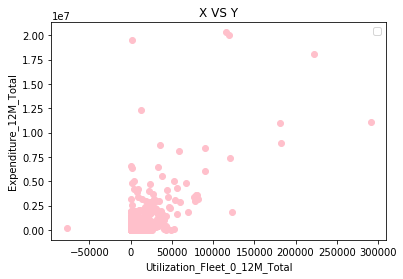

In [32]:
#create the scatter plot from data1
plt.plot(x,y,'o',color = 'Pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('Utilization_Fleet_0_12M_Total')
plt.ylabel('Expenditure_12M_Total')
plt.legend()
plt.show()
#Scatter plot shows a few extreme samples. Total rows 456

### Remove outliers

In [33]:
#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

x = test_reduced_by_z['Utilization_Fleet_0_12M_Total']
y = test_reduced_by_z['Expenditure_12M_Total']
test_reduced_by_z.describe()

,Utilization_Fleet_0_12M_Total,Expenditure_12M_Total
count,"9,095.00","9,095.00"
mean,684.73,"50,513.27"
std,"2,164.20","163,608.20"
min,-90.00,"-11,618.76"
25%,0.00,128.21
50%,0.00,"1,475.24"
75%,146.00,"12,788.83"
max,"21,985.00","1,860,119.97"


No handles with labels found to put in legend.


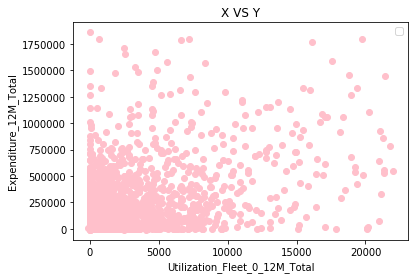

In [34]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('Utilization_Fleet_0_12M_Total')
plt.ylabel('Expenditure_12M_Total')
plt.legend()
plt.show()

In [35]:
test_reduced_by_z.corr()

,Utilization_Fleet_0_12M_Total,Expenditure_12M_Total
Utilization_Fleet_0_12M_Total,1.00,0.56
Expenditure_12M_Total,0.56,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E25A6FC508>,
      dtype=object)

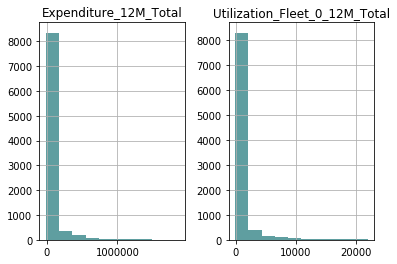

In [36]:
test_reduced_by_z.hist(grid = True, color = 'CadetBlue')

In [37]:
x_kurtosis = kurtosis(test_reduced_by_z['Utilization_Fleet_0_12M_Total'], fisher = True)
y_kurtosis = kurtosis(test_reduced_by_z['Expenditure_12M_Total'], fisher = True)

x_skew = skew(test_reduced_by_z['Utilization_Fleet_0_12M_Total'])
y_skew = skew(test_reduced_by_z['Expenditure_12M_Total'])

display("Utilization_Fleet_0_12M_Total_kurtosis: {:2}".format(x_kurtosis))
display(stats.kurtosistest(test_reduced_by_z['Utilization_Fleet_0_12M_Total']))
print('\n')
display("Utilization_Fleet_0_12M_Total_skew: {:2}".format(x_skew))
display(stats.skewtest(test_reduced_by_z['Utilization_Fleet_0_12M_Total']))
print('\n')
display("Expenditure_12M_Total: {:2}".format(y_kurtosis))
display(stats.kurtosistest(test_reduced_by_z['Expenditure_12M_Total']))
print('\n')
display("Expenditure_12M_Total: {:2}".format(y_skew))
display(stats.skewtest(test_reduced_by_z['Expenditure_12M_Total']))

'Utilization_Fleet_0_12M_Total_kurtosis: 33.221498268313084'

KurtosistestResult(statistic=51.77077437001283, pvalue=0.0)

'Utilization_Fleet_0_12M_Total_skew: 5.227951507418931'

SkewtestResult(statistic=81.37998376291726, pvalue=0.0)

'Expenditure_12M_Total: 35.088955664122516'

KurtosistestResult(statistic=52.23053116926102, pvalue=0.0)

'Expenditure_12M_Total: 5.333897913666952'

SkewtestResult(statistic=82.01155405459349, pvalue=0.0)

### Build a model

In [38]:
# define our input variable & output variable
x = test_reduced_by_z[['Utilization_Fleet_0_12M_Total']]
y = test_reduced_by_z[['Expenditure_12M_Total']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Expenditure_12M_Total   R-squared (uncentered):                   0.349
Model:                               OLS   Adj. R-squared (uncentered):              0.349
Method:                    Least Squares   F-statistic:                              3901.
Date:                   Fri, 01 May 2020   Prob (F-statistic):                        0.00
Time:                           11:28:10   Log-Likelihood:                         -96369.
No. Observations:                   7276   AIC:                                  1.927e+05
Df Residuals:                       7275   BIC:                                  1.927e+05
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025     

### Verify model is valid by adding constant

In [39]:
#Evaluate Traning model
# add constant
x_train2 = sm.add_constant(x_train)
# create a OLS model.
model2 = sm.OLS(y_train, x_train2)
# fit the data
est2 = model2.fit()
# make some confidence intervals, 95% by default.
est2.conf_int()

C:\Users\julianyang\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0,1
const,"18,916.32","25,432.84"
Utilization_Fleet_0_12M_Total,38.99,41.81


In [40]:
# estimate the p-values
est2.pvalues

const                               0.00
Utilization_Fleet_0_12M_Total       0.00
dtype: float64

### Explore model

In [41]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

The Coefficient for training model is 40.40132763602576
The intercept for training model is 22174.582796154064


In [42]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 18397646557.7212
MAE 56439.44318962682
RMSE 135637.92448176577


In [44]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

R2 of the prediction is: 0.37


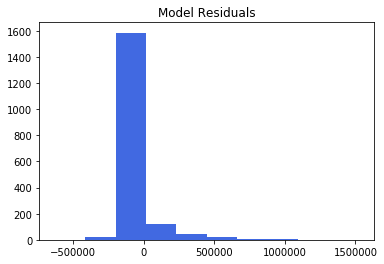

In [45]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

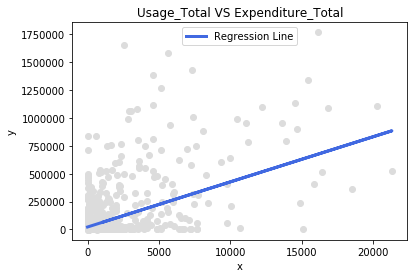

Coefficient:4e+01
Mean squared error: 1.84e+10
Root Mean squared error: 1.356e+05
R2 score: 0.37


In [46]:
# Plot outputs
plt.scatter(x_test, y_test,  color='gainsboro', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Usage_Total VS Expenditure_Total")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Conclusion

## Test 2: x = OLGAAmount y= Expenditure_12M_PartsNServices

### Test 2

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['OLGAAmount', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['OLGAAmount']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
test_reduced_by_z.hist(grid = True, color = 'Purple')

In [ ]:
display(stats.kurtosistest(test_reduced_by_z['OLGAAmount']))
display(stats.skewtest(test_reduced_by_z['OLGAAmount']))
print('\n')
display(stats.kurtosistest(test_reduced_by_z['Expenditure_12M_PartsNServices']))
display(stats.skewtest(test_reduced_by_z['Expenditure_12M_PartsNServices']))

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['OLGAAmount']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("OLGAAmount VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 2 Conclusion

## Test 3: x = Count_CatFleetSize y= Expenditure_12M_PartsNServices

### Test 3

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Count_CatFleetSize', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Count_CatFleetSize']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
test_reduced_by_z.hist(grid = True, color = 'Purple')

In [ ]:
display(stats.kurtosistest(test_reduced_by_z['Count_CatFleetSize']))
display(stats.skewtest(test_reduced_by_z['Count_CatFleetSize']))

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Count_CatFleetSize']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Count_CatFleetSize VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 3 Conclusion

## Test 4: x = SOS_COUNT_CU_0_12M  y= Expenditure_12M_PartsNServices

### Test 4

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['SOS_COUNT_CU_0_12M', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['SOS_COUNT_CU_0_12M']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
test_reduced_by_z.hist(grid = True, color = 'Purple')

In [ ]:
display(stats.kurtosistest(test_reduced_by_z['SOS_COUNT_CU_0_12M']))
display(stats.skewtest(test_reduced_by_z['SOS_COUNT_CU_0_12M']))

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['SOS_COUNT_CU_0_12M']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("SOS_COUNT_CU_0_12M VS PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 4 Conclusion

## Test 5: x = Family_Expenditure_12M_Rentals y= Expenditure_12M_Total

### Test 5

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Family_Expenditure_12M_Rentals', 'Expenditure_12M_Total']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Family_Expenditure_12M_Rentals']
y = test_reduced_by_z['Expenditure_12M_Total']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
test_reduced_by_z.hist(grid = True, color = 'Purple')

In [ ]:
display(stats.kurtosistest(test_reduced_by_z['Family_Expenditure_12M_Rentals']))
display(stats.skewtest(test_reduced_by_z['Family_Expenditure_12M_Rentals']))

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Family_Expenditure_12M_Rentals']]
y = test_reduced_by_z[['Expenditure_12M_Total']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("FamilyExpenditure_Rentals VS Expenditure_12M_Total")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 5 Conclusion

## Test 6: x = PercentageFleet_Utilized_0_12M y= Expenditure_12M_Equipment

### Test 6

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['PercentageFleet_Utilized_0_12M', 'Expenditure_12M_Equipment']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['PercentageFleet_Utilized_0_12M']
y = test_reduced_by_z['Expenditure_12M_Equipment']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
test_reduced_by_z.hist(grid = True, color = 'Purple')

In [ ]:
display(stats.kurtosistest(test_reduced_by_z['PercentageFleet_Utilized_0_12M']))
display(stats.skewtest(test_reduced_by_z['PercentageFleet_Utilized_0_12M']))

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['PercentageFleet_Utilized_0_12M']]
y = test_reduced_by_z[['Expenditure_12M_Equipment']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("PercentageFleet_Utilized_0_12M VS Expenditure_12M_Equipment")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 6 Conclusion

## Test 7: x = Percentage_SubscriptionActive y= Expenditure_12M_Equipment

### Test 7

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['PercentageFleet_Utilized_0_12M', 'Expenditure_12M_Equipment']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['PercentageFleet_Utilized_0_12M']
y = test_reduced_by_z['Expenditure_12M_Equipment']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
test_reduced_by_z.hist(grid = True, color = 'Purple')

In [ ]:
display(stats.kurtosistest(test_reduced_by_z['PercentageFleet_Utilized_0_12M']))
display(stats.skewtest(test_reduced_by_z['PercentageFleet_Utilized_0_12M']))

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['PercentageFleet_Utilized_0_12M']]
y = test_reduced_by_z[['Expenditure_12M_Equipment']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("PercentageFleet_Utilized_0_12M VS Expenditure_12M_Equipment")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 7 Conclusion

## Test 8: x = Average_Fleet_Annual_Utilization y= Expenditure_12M_Total

### Test 8

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Average_Fleet_Annual_Utilization', 'Expenditure_12M_Total']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Average_Fleet_Annual_Utilization']
y = test_reduced_by_z['Expenditure_12M_Total']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# #Remove negative x
# test_absolute_x = test_reduced_by_z[test_reduced_by_z['Average_Fleet_Annual_Utilization'] >= 0]

# x = test_absolute_x['Average_Fleet_Annual_Utilization']
# y = test_absolute_x['Expenditure_12M_Total']
# test_reduced_by_z.describe()

In [ ]:
# #create the new scatter plot
# plt.plot(x,y,'o',color = 'pink', label = '')
# # add the column names as labels
# plt.title('X VS Y')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
test_reduced_by_z.hist(grid = True, color = 'Purple')

In [ ]:
display(stats.kurtosistest(test_reduced_by_z['Average_Fleet_Annual_Utilization']))
display(stats.skewtest(test_reduced_by_z['Average_Fleet_Annual_Utilization']))

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Average_Fleet_Annual_Utilization']]
y = test_reduced_by_z[['Expenditure_12M_Total']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Average_Fleet_Annual_Utilization VS Expenditure_12M_Total")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 8 Conclusion

## Test 9: x = Mean_SMU_Between_SOS y= Expenditure_12M_Total


### Test 9

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Mean_SMU_Between_SOS', 'Expenditure_12M_Total']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Mean_SMU_Between_SOS']
y = test_reduced_by_z['Expenditure_12M_Total']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Mean_SMU_Between_SOS']]
y = test_reduced_by_z[['Expenditure_12M_Total']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Mean_SMU_Between_SOS VS Expenditure_12M_Total")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 9 Conclusion

## Test 10: x = Mean_SMU_Between_Repairs y= Expenditure_12M_PartsNServices


### Test 10

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Mean_SMU_Between_Repairs', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Mean_SMU_Between_Repairs']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
#Remove negative x
test_absolute_x = test_reduced_by_z[test_reduced_by_z['Mean_SMU_Between_Repairs'] >= 0]
x = test_absolute_x['Mean_SMU_Between_Repairs']
y = test_absolute_x['Expenditure_12M_PartsNServices']
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_absolute_x.corr()

In [ ]:
# define our input variable & output variable
x = test_absolute_x[['Mean_SMU_Between_Repairs']]
y = test_absolute_x[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Mean_SMU_Between_Repairs VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 10 Conclusion

## Test 11: x = Family_Accounts y= Expenditure_12M_Total


### Test 11

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Family_Accounts', 'Expenditure_12M_Total']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Family_Accounts']
y = test_reduced_by_z['Expenditure_12M_Total']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Family_Accounts']]
y = test_reduced_by_z[['Expenditure_12M_Total']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Family_Accounts VS Expenditure_12M_Total")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 11 Conclusion

## Test 12: x = Average_Count_SOS_Per_Unit_0_12M y= Expenditure_12M_Total


### Test 12

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Average_Count_SOS_Per_Unit_0_12M', 'Expenditure_12M_Total']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Average_Count_SOS_Per_Unit_0_12M']
y = test_reduced_by_z['Expenditure_12M_Total']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Normalize Expenditure to ExpenditurePerUnit !!! Not sure how to create array need time

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Average_Count_SOS_Per_Unit_0_12M', 'Expenditure_12M_Total','Count_CatFleetSize']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Average_Count_SOS_Per_Unit_0_12M']
y = test_reduced_by_z['Expenditure_12M_Total'] / test_reduced_by_z['Count_CatFleetSize']

test_reduced_by_z.describe()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Average_Count_SOS_Per_Unit_0_12M']]
y = test_reduced_by_z[['Expenditure_12M_Total']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Average_Count_SOS_Per_Unit_0_12M VS Expenditure_12M_Total")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 12 Conclusion

## Test 13: x = Average_Count_WorkOrder_Per_Unit_0_12M y= Expenditure_12M_Total


### Test 13

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Average_Count_WorkOrder_Per_Unit_0_12M', 'Expenditure_12M_Total']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Average_Count_WorkOrder_Per_Unit_0_12M']
y = test_reduced_by_z['Expenditure_12M_Total']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Normalize Expenditure to ExpenditurePerUnit !!! Not sure how to create array need time

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Average_Count_WorkOrder_Per_Unit_0_12M', 'Expenditure_12M_Total']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Average_Count_WorkOrder_Per_Unit_0_12M']
y = test_reduced_by_z['Expenditure_12M_Total']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Average_Count_WorkOrder_Per_Unit_0_12M']]
y = test_reduced_by_z[['Expenditure_12M_Total']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Average_Count_WorkOrder_Per_Unit_0_12M VS Expenditure_12M_Total")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 13 Conclusion

## Test 14: x = PartsDCAL y= Expenditure_12M_PartsNServices

### Test 14

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['PartsDCAL', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['PartsDCAL']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['PartsDCAL']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("PartsDCAL VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 14 Conclusion

## Test 15: x = ServiceDCAL y= Expenditure_12M_PartsNServices

### Test 15

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['ServiceDCAL', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['ServiceDCAL']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['ServiceDCAL']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("ServiceDCAL VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 15 conclusion

## Test 16: x = Count_FleetSize y= Count_CatFleetSize

### Test 16

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Count_FleetSize', 'Count_CatFleetSize']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Count_FleetSize']
y = test_reduced_by_z['Count_CatFleetSize']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

### Test 16 conclusion

In [ ]:
# I agree Fleet size is highly correlated with cat fleet size and should not be used

## Test 17: x = Family_CatFleetSize y= Count_CatFleetSize

### Test 17

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Family_CatFleetSize', 'Count_CatFleetSize']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Family_CatFleetSize']
y = test_reduced_by_z['Count_CatFleetSize']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Family_CatFleetSize']]
y = test_reduced_by_z[['Count_CatFleetSize']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Family_CatFleetSize VS Count_CatFleetSize")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 17 Conclusion

## Test 18: x = Family_FleetSize y= Family_CatFleetSize

### Test 18

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Family_FleetSize', 'Family_CatFleetSize']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Family_FleetSize']
y = test_reduced_by_z['Family_CatFleetSize']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Family_FleetSize']]
y = test_reduced_by_z[['Family_CatFleetSize']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

### Test 18 conclusion

## Test 19: x = Family_CatFleetSize y= Expenditure_12M_PartsNServices

### Test 19

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Family_CatFleetSize', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Family_CatFleetSize']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# #reduce X to under 1500
test_reduced_by_z = test_reduced_by_z[test_reduced_by_z['Family_CatFleetSize'] <= 1500]

x = test_reduced_by_z['Family_CatFleetSize']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']
test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Family_CatFleetSize']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Family_CatFleetSize VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 19 Conclusion

## Test 20: x = Family_Expenditure_12M_Equipment y= Expenditure_12M_PartsNServices

### Test 20

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Family_Expenditure_12M_Equipment', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Family_Expenditure_12M_Equipment']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['Family_Expenditure_12M_Equipment']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Family_Expenditure_12M_Equipment VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 20 conclusion

## Test 21: x = Family_Expenditure_12M_PartsNServices y= Expenditure_12M_PartsNServices

### Test 21

In [ ]:
#Create subset data1 for testing ideal element
test = data_dropna.loc[:, ['Family_Expenditure_12M_PartsNServices', 'Expenditure_12M_PartsNServices']]

#remove extreme outliers:
#If you have multiple columns in your dataframe and would like to remove all rows that have outliers in at least one column, 
#the following expression would do that in one shot: select absolute Z score for the row <1.65 (). .all or .any
test_reduced_by_z = test[(np.abs(stats.zscore(test)) < 3).all(axis=1)]

#define the x & y data
x = test_reduced_by_z['Family_Expenditure_12M_PartsNServices']
y = test_reduced_by_z['Expenditure_12M_PartsNServices']

test_reduced_by_z.describe()

In [ ]:
#create the new scatter plot
plt.plot(x,y,'o',color = 'pink', label = '')
# add the column names as labels
plt.title('X VS Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
test_reduced_by_z.corr()

In [ ]:
# define our input variable & output variable
x = test_reduced_by_z[['PartsDCAL']]
y = test_reduced_by_z[['Expenditure_12M_PartsNServices']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)
# create OLS model for training data
model = sm.OLS(y_train, x_train)
# pass through the X_train & y_train data set.
est = model.fit()
print(est.summary())

In [ ]:
# make some confidence intervals, 95% by default.
est.conf_int()

In [ ]:
# estimate the p-values
est.pvalues

In [ ]:
# calculate and display intercept, coefficient
intercept = single_regression_model.intercept_[0]
coefficient = single_regression_model.coef_[0][0]
# print out
print("The Coefficient for training model is {:2}".format(coefficient))
print("The intercept for training model is {:4}".format(intercept))

In [ ]:
# create prediction value and calculate errors
y_predict = single_regression_model.predict(x_test)
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)
# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2 of the prediction is: {:.2}".format(model_r2))

In [ ]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'Gold')
plt.title("Model Residuals")
plt.show()

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='pink', label = '')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Family_Expenditure_12M_PartsNServices VS Expenditure_12M_PartsNServices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# The coefficients
print('Coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(single_regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Test 21 Conclusion

# Next Steps

## regularization

## Split dataset by POPS